# Machine Learning

## Imports

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

## Importar dados normalizados

In [4]:
dados = pd.read_csv('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Dados/Dados tratados.csv')
dados.head()

,Área Inicial,Módulo elástico,Carga no escoamento,Tensão de escoamento,Dedformação no escoamento,Força máxima,Tensão na força máxima,Deformação na força máxima,Força de ruptura,Deformação na ruptura,Plano,Plano ID
0,0.816843,0.187500,0.390476,0.147531,0.356275,0.778571,0.173452,0.505632,0.391892,0.578268,deitado,0
1,0.912370,0.207031,0.314286,0.000000,0.295547,0.778571,0.010531,0.530113,0.000000,0.627464,deitado,0
2,0.687619,0.125000,0.266667,0.122842,0.554656,0.578571,0.115287,0.714046,0.614865,0.453942,deitado,0
3,0.755887,0.320312,0.314286,0.117993,0.271255,0.714286,0.189186,0.583170,0.425676,0.539367,deitado,0
4,0.713242,0.082031,0.257143,0.092959,0.489879,0.592857,0.090627,0.570232,0.594595,0.527982,deitado,0


## Ajuste de hiperparâmetros

In [479]:
def create_heatmap(par1,label1,par2,label2,scores,w,h,annot,df):
    scores_df = pd.DataFrame(columns=par1,index=par2)

    for i in range(len(par1)*len(par2)):
        col = i % len(par1)
        row = i // len(par1)
        scores_df.iloc[row,col] = scores[i]

    scores_df = scores_df.astype(float)
    if df:
        print(scores_df)
    fig= plt.figure(figsize=(w,h))
    g = sns.heatmap(scores_df,annot=annot)
    plt.xlabel(label1)
    plt.ylabel(label2);
    

## `K` para o KNN

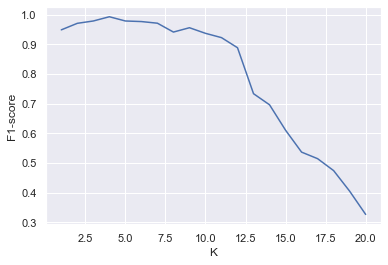

In [356]:
knn_score = []
max_k = 20
ks=[i for i in range(1,max_k+1)]

for k in ks:
    score = 0.0
    for train_index, test_index in sss.split(X, y):    
        X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        knn = make_pipeline(StandardScaler(),
                            KNeighborsClassifier(n_neighbors=k))
        knn.fit(X_train, y_train)
        pred_knn = knn.predict(X_test)
        score += f1_score(y_test,pred_knn,average='weighted',pos_label="Plano ID")
        
    score /= float(n_splits) 
    knn_score.append(score)
        
plt.plot(ks,knn_score)
plt.ylabel('F1-score')
plt.xlabel('K');
k_opt = 4

## `l1_ratio`  and `alpha` para o SGD

           0.1       0.4       0.7       1.0
0.01  0.985397  0.983571  0.978050  0.985193
0.04  0.977937  0.977937  0.976224  0.976111
0.07  0.977937  0.970680  0.968764  0.976111
0.10  0.947426  0.954796  0.963169  0.948566
0.13  0.971111  0.963373  0.929915  0.870544


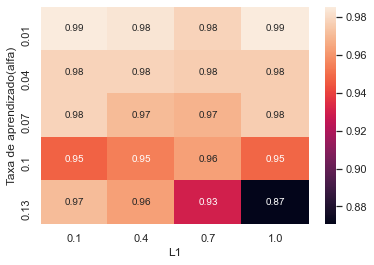

In [491]:
sgd_score = []
alphas = np.arange(0.01,0.15, 0.03).round(3)
l1s = np.arange(0.1,1.1,0.3).round(2)

for alpha in alphas:
    for l1 in l1s:
        score = 0.0
        for train_index, test_index in sss.split(X, y):    
            X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
            sgd = make_pipeline(StandardScaler(),
                                SGDClassifier(random_state=42,penalty='elasticnet',alpha=alpha,l1_ratio=l1))
            sgd.fit(X_train, y_train)
            pred_sgd = sgd.predict(X_test)
            score += f1_score(y_test,pred_sgd,average='weighted',pos_label="Plano ID")
        
        score /= float(n_splits)
        sgd_score.append(score)
        
create_heatmap(l1s,'L1',alphas,'Taxa de aprendizado(alfa)',sgd_score,6,4,True,True)
alpha_opt = 0.01
l1_opt = 0.1

## `C` e `degree` para o SVM. `gamma` foi mantido em _auto_

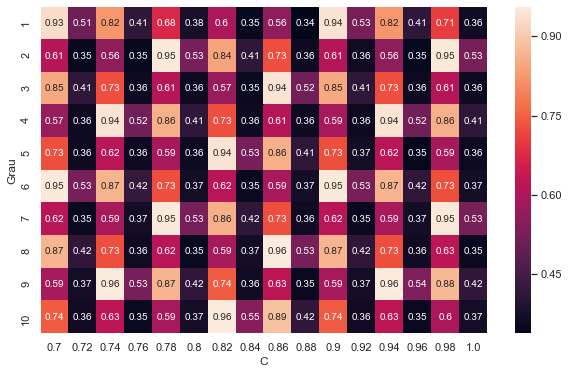

In [484]:
svc_score = []
Cs = np.arange(0.70,1.01,0.02)
Cs = Cs.round(2)
degrees = range(1,11)

for C in Cs:
    for degree in degrees:
        score = 0.0
        for train_index, test_index in sss.split(X, y):    
            X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
            svc = make_pipeline(StandardScaler(),
                                SVC(random_state=42,kernel='poly',C=C,degree=degree,probability=True))
            svc.fit(X_train,y_train)
            pred_svc = svc.predict(X_test)
            score += f1_score(y_test,pred_svc,average='weighted',pos_label="Plano ID")
        
        score /= float(n_splits)
        svc_score.append(score)

create_heatmap(Cs,'C',degrees,'Grau',svc_score,10,6,True,False)

C_opt = 0.74
degree_opt = 6

## `max_depth` para Árvore de Decisão

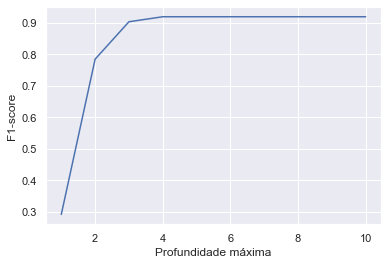

In [386]:
tree_score = []
max_depth = 10
depths = [i for i in range(1,max_depth+1)]


for depth in depths:
    score = 0.0
    for train_index, test_index in sss.split(X, y):    
        X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        tree = make_pipeline(StandardScaler(),
                            DecisionTreeClassifier(random_state=42,max_depth=depth))
        tree.fit(X_train,y_train)
        pred_tree = tree.predict(X_test)
        score += f1_score(y_test,pred_tree,average='weighted',pos_label="Plano ID")
                            
    score /= float(n_splits)
    tree_score.append(score)
    
max_depth_opt = 4
plt.plot(depths,tree_score)
plt.ylabel('F1-score')
plt.xlabel('Profundidade máxima');

## Separando Treino e Teste para diferentes splits, usando cross fold validation. 

In [494]:
X = dados[['Tensão na força máxima','Deformação na ruptura']]
y = dados['Plano ID']

n_splits = 10
test_size = 0.35

sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

knn_score = 0.0
sgd_score = 0.0
svc_score = 0.0
tree_score = 0.0

for train_index, test_index in sss.split(X, y):    
    X_train,X_test,y_train,y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]

    #KNN
    knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=4))
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    knn_score += f1_score(y_test,pred_knn,average='weighted',pos_label="Plano ID")
    
    #SGD
    sgd = make_pipeline(StandardScaler(),
                        SGDClassifier(random_state=42,penalty='elasticnet',alpha=alpha_opt,l1_ratio=l1_opt))
    sgd.fit(X_train, y_train)
    pred_sgd = sgd.predict(X_test)
    sgd_score += f1_score(y_test,pred_sgd,average='weighted',pos_label="Plano ID")
    
    #SVC
    svc = make_pipeline(StandardScaler(),
                        SVC(random_state=42,C=C_opt,kernel='sigmoid'))
    svc.fit(X_train,y_train)
    pred_svc = svc.predict(X_test)
    svc_score += f1_score(y_test,pred_svc,average='weighted',pos_label="Plano ID")
    
    #Decision Trees
    tree = make_pipeline(StandardScaler(),
                        DecisionTreeClassifier(random_state=42,max_depth=max_depth_opt))

    tree.fit(X_train,y_train)
    pred_tree = tree.predict(X_test)
    tree_score += f1_score(y_test,pred_tree,average='weighted',pos_label="Plano ID")
    
knn_score /= float(n_splits)
sgd_score /= float(n_splits)
svc_score /= float(n_splits)
tree_score /= float(n_splits)

print(f'F1 score for KNN={knn_score}, SGD={sgd_score}, SVC={svc_score}, Decision Trees={tree_score}')

F1 score for KNN=0.9925396825396826, SGD=0.9853968253968255, SVC=0.9853968253968255, Decision Trees=0.9191950113378684


## Plotar resultados

### KNN

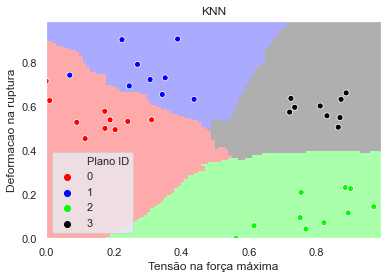

In [495]:
n_neighbors = 4
h = .01

x_min, x_max = X.iloc[:,0].min(), X.iloc[:,0].max() 
y_min, y_max = X.iloc[:,1].min(), X.iloc[:,1].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF','#AAFFAA','#AFAFAF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF','#00FF00','#000000'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x = 'Tensão na força máxima', y = 'Deformação na ruptura', data= dados, hue = 'Plano ID', palette=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Tensão na força máxima')
plt.ylabel('Deformacao na ruptura')
plt.title('KNN')
plt.show()

### SGD

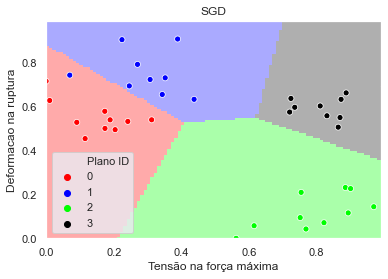

In [496]:
Z = sgd.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF','#AAFFAA','#AFAFAF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF','#00FF00','#000000'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x = 'Tensão na força máxima', y = 'Deformação na ruptura', data= dados, hue = 'Plano ID', palette=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Tensão na força máxima')
plt.ylabel('Deformacao na ruptura')
plt.title('SGD')
plt.show()

### SVM

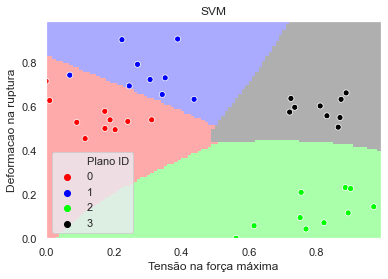

In [497]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF','#AAFFAA','#AFAFAF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF','#00FF00','#000000'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x = 'Tensão na força máxima', y = 'Deformação na ruptura', data= dados, hue = 'Plano ID', palette=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Tensão na força máxima')
plt.ylabel('Deformacao na ruptura')
plt.title('SVM')
plt.show()

### Árvore de Decisão

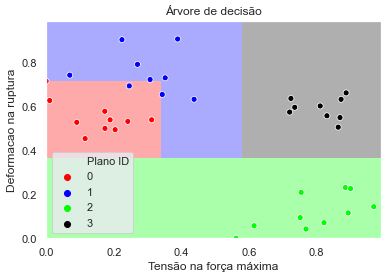

In [498]:
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF','#AAFFAA','#AFAFAF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF','#00FF00','#000000'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x = 'Tensão na força máxima', y = 'Deformação na ruptura', data= dados, hue = 'Plano ID', palette=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Tensão na força máxima')
plt.ylabel('Deformacao na ruptura')
plt.title('Árvore de decisão')
plt.show()